# OpenClassrooms - Ingenieur IA
# Projet 7 - AirParadis
# Détectez les Bad Buzz grâce au Deep Learning

## Objectif du projet : 
- **Développer le prototype d’un produit IA permettant de prédire le sentiment associé à un tweet**

## Trois approches :
- **Approche 1 : 'API sur étagère' en utilisant l’API du service cognitif proposé par Microsoft Azure pour l’analyse de sentiment**
- **Approche 2 : 'Modèle sur mesure simple' en utilisant le service Azure Machine Learning Studio**
- **Approche 3 : 'Modèle sur mesure avancé' en utilisant le service Azure Machine Learning pour développer un modèle basé sur des réseaux de neurones profonds pour prédire le sentiment associé à un tweet**

## Plan :
- **Approche 1 : API sur étagère**
    - Chargement des données
    - Récupération de la clé d'authentification et du endpoint de connection à l'API Azure
    - Authentification auprès de l'API
    - Envoi de la requête et récupération du résultat
    - Résultat
- **Approche 2 : Modèle sur mesure simple**
    - Récupération du modèle réalisé dans Azure Machine Learning
    - Lien vers le modèle
    - Résultat
- **Approche 3 : Modèle sur mesure avancé**
    - Résultat
- **Comparaison des trois approches et conclusion**

### Note explicative :
- Ce Notebook implémente l'approche : 'API sur étagère'
- Et présente une comparaison des trois approches : 'API sur étagère', 'Modèle sur mesure simple' et 'Modèle sur mesure avancé'
- La comparaison se fait sur le jeu de données 'app' de 2000 Tweets spécialement créé pour cela

In [1]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
from azureml.core import Workspace
import warnings
warnings.filterwarnings('ignore')

# Approche 1 : API sur étagère

## Chargement des données

In [2]:
df_app = pd.read_csv('airparadis_app_dataset.csv')

In [3]:
df_app.shape

(2000, 3)

In [4]:
df_app

,SENTIMENT,TWEET,TWEET_PREPROCESSED
0,1,Pictures!!,Pictures!!
1,1,just watched One Tree Hill episode 22 season 6...,just watched One Tree Hill episode season ... ...
2,1,and so the micro blogging begins!!,and so the micro blogging begins!!
3,1,awesooome. i found me some chickeeen waaangs t...,awesooome. i found me some chickeeen waaangs t...
4,0,Please don't go.,Please don't go.
...,...,...,...
1995,1,Rain wont stop.... bring on the munchies and t...,Rain wont stop.... bring on the munchies and t...
1996,1,@citylivinggirl Thank you,Thank you
1997,1,tonight was fun,tonight was fun
1998,0,Back from #phish. The only downer was leaving ...,Back from . The only downer was leaving and se...


In [5]:
X_app = df_app["TWEET_PREPROCESSED"].values
y_app = df_app["SENTIMENT"].values

In [6]:
print("X_validation Shape:", X_app.shape)
print("y_validation Shape:", y_app.shape)

X_validation Shape: (2000,)
y_validation Shape: (2000,)


In [7]:
X_app

array(['Pictures!!',
       'just watched One Tree Hill episode season ... never cried this much since keith died!!!!!! OTH is epic for sure!!!!!! Xxx',
       'and so the micro blogging begins!!', ..., 'tonight was fun',
       'Back from . The only downer was leaving and seeing hundreds and hundreds of people sucking down balloons.',
       "Good afternoon!!!! Twitteralley!!! Working hard today. Hadn't had enough time to visit the past days."],
      dtype=object)

In [8]:
y_app

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

## Récupération de la clé d'authentification et du endpoint de connection à l'API Azure

##### Remarque :
- Pour des raisons de sécurité, afin qu'ils n'apparaissent pas en clair dans le code, la clé et le endpoint de l'API sont enregistrés dans les variables d'environnement

In [9]:
key = os.environ['KEY_AIRPARADIS']
endpoint = os.environ['ENDPOINT_AIRPARADIS']

## Authentification auprès de l'API

In [10]:
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint,
            credential=ta_credential)
    return text_analytics_client

In [11]:
client = authenticate_client()

## Envoi de la requête et récupération du résultat

In [12]:
def sentiment_analysis(client, tweet):
    response = client.analyze_sentiment(documents=tweet)[0]
    sentiment = 0 if response.confidence_scores.negative > 0.5 else 1
    return sentiment

In [13]:
y_pred_API = []
for tweet in X_app:
    result = sentiment_analysis(client, [tweet])
    y_pred_API.append(result)

## Résultat

#### Accuracy

In [16]:
accuracy_modele_etagere = accuracy_score(y_app, y_pred_API)

In [17]:
print(f"Accuracy score 'Modèle API sur étagère'= {accuracy_modele_etagere:.3f}")

Accuracy score 'Modèle API sur étagère'= 0.683


#### Matrice de confusion

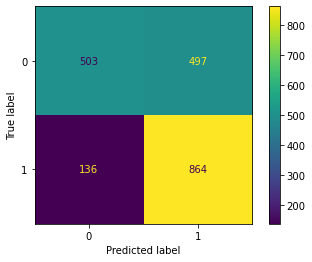

In [18]:
cm = confusion_matrix(y_app, y_pred_API)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

#### Rapport de classification

In [19]:
print(classification_report(y_app, y_pred_API))

              precision    recall  f1-score   support

           0       0.79      0.50      0.61      1000
           1       0.63      0.86      0.73      1000

    accuracy                           0.68      2000
   macro avg       0.71      0.68      0.67      2000
weighted avg       0.71      0.68      0.67      2000



# Approche 2 : Modèle sur mesure simple

## Récupération du modèle réalisé dans Azure Machine Learning

In [20]:
azure_subscription_id = os.environ['AZURE_SUBSCRIPTION_ID']

In [21]:
ws = Workspace(subscription_id=azure_subscription_id,
              resource_group="OC-IA-P7",
              workspace_name="ws-OC-P7")

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


In [22]:
run_id = '237b8921-2a8f-46c9-9922-8ada5d9834f8'
exp = ws.experiments['OC-IA-P7_Modele-simple_EXP']
run = next(run for run in exp.get_runs() if run.id == run_id)

### Lien vers le modèle

In [23]:
run

Experiment,Id,Type,Status,Details Page,Docs Page
OC-IA-P7_Modele-simple_EXP,237b8921-2a8f-46c9-9922-8ada5d9834f8,azureml.PipelineRun,Completed,Link to Azure Machine Learning studio,Link to Documentation


### Résultat

In [24]:
accuracy_modele_simple = 0.755

In [25]:
print(f"Accuracy score 'Modèle sur mesure simple' = {accuracy_modele_simple:.3f}")

Accuracy score 'Modèle sur mesure simple' = 0.755


# Approche 3 : Modèle sur mesure avancé

### Résultat

In [26]:
accuracy_modele_avance = 0.822

In [27]:
print(f"Accuracy score 'Modèle avancé' = {accuracy_modele_avance:.3f}")

Accuracy score 'Modèle avancé' = 0.822


# Comparaison des trois approches et conclusion

In [28]:
app = ['API_sur_étagère', 'Modèle_sur_mesure_simple', 'Modèle_sur_mesure_avancé']
accuracy = [accuracy_modele_etagere, accuracy_modele_simple, accuracy_modele_avance]
x=[0,1,2]

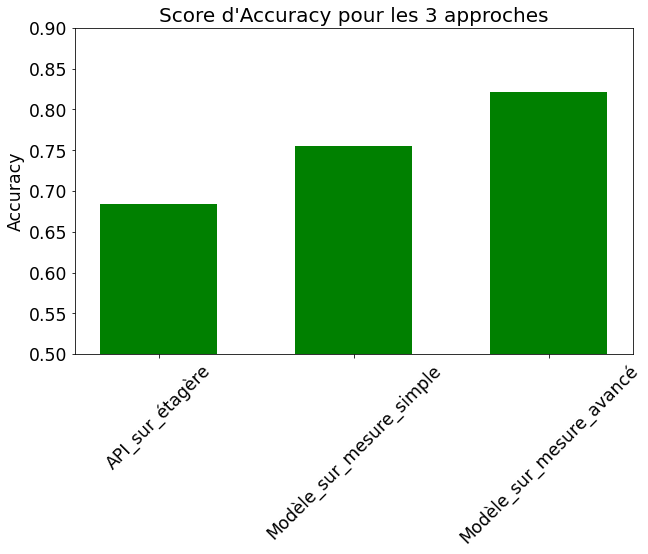

In [31]:
plt.figure(figsize=(10,6))
plt.bar(x, accuracy, 0.6, color='g')
plt.title("Score d'Accuracy pour les 3 approches", fontsize=20)
plt.xticks(range(len(app)), app, size='xx-large', rotation=45)
plt.ylabel("Accuracy", size='xx-large')
plt.yticks(size='xx-large')
plt.ylim(0.5, 0.9)
plt.show()

### Conclusion :
- Le modèle donnant la meilleure Accuracy est le modèle sur mesure avancé de Deep Learning (GRU), suivi par le modèle sur mesure simple puis le modèle API sur étagère
- On remarque qu’il y a un lien entre le niveau de complexité du modèle et de sa mise en place et le résultat obtenu : plus le modèle est ‘avancé’, meilleur est le résultat.